In [1]:
# install.packages("rpart")   # ha nincs meg, akkor ezt kell lefuttatni
library("rpart")

In [2]:
data<-read.csv("globalterrorismdb_0617dist.csv", header = T, sep = ";", skipNul = T)

In [3]:
# Itt adjuk hozzá az osztályozást az adatokhoz
borders <- as.matrix(c(1,5,10,100))
classes<-rep(0,nrow(data))
for (i in 1:nrow(data))
{
  # ha nincs adat az áldozatok számáról, akkor az osztálya -1
  if(is.na(data[i,'nkill']))
    classes[i]<--1
  else
  {
    for (j in 1:nrow(borders)) 
    {
      if (data[i,'nkill']<borders[j])
      {
        classes[i]<-j
        break()
      }
    }
    if(classes[i]==0)
      classes[i]<-5
  }
}

# az adatokat és a hozzájuk tartozó címkéket egy táblázatba tesszük
newdata<-cbind(data,classes)
# kiszűrjük azokat a sorokat, ahol nincs osztályozás
newdata<-newdata[newdata[,'classes']!=-1,]

In [4]:
# az adatok 80%-a lesz a tanítóhalmaz
tr_idx<-sample(nrow(newdata), nrow(newdata)*0.8)
train<-newdata[tr_idx,]
test<-newdata[-tr_idx,]

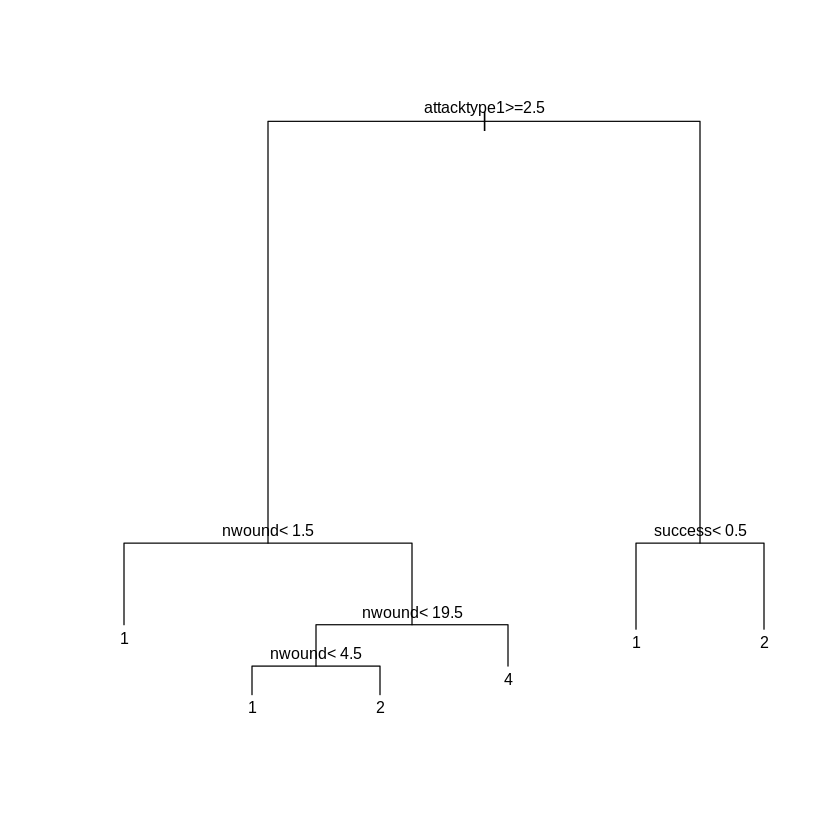

In [5]:
# itt lehet játszani a paraméterekkel: a fa tanítása
tree<-rpart(factor(classes)~iyear+imonth+iday+extended+country+region+specificity+vicinity+crit1+crit2+crit3+doubtterr+
            alternative+multiple+success+suicide+attacktype1+attacktype2+attacktype3+targtype1+targsubtype1+natlty1+
            targtype2+targsubtype2+natlty2+targtype3+targsubtype3+natlty3+guncertain1+guncertain2+guncertain3+individual+
            nperps+claimed+claimmode+claim2+claimmode2+claim3+claimmode3+compclaim+weaptype1+weapsubtype1+weaptype2+
            weapsubtype2+weaptype3+weapsubtype3+weaptype4+weapsubtype4+nwound+nwoundte+property+propextent+ishostkid+
            nhostkid+ndays+ransom+hostkidoutcome+nreleased+INT_LOG+INT_IDEO+INT_MISC+INT_ANY,data=train)
# kirajzolja a fát
plot(tree)
# szöveggel látja el az ábrát
text(tree,cex=.8)

# Tapasztalatok

A **diszkrét numerikus** változókkal, amelyeknek *kisebb értékintervalluma* van, jól boldogul az rpart, ezekre a leghatékonyabb. Ide tartoznak az olyan diszkrét numerikus változók, mint amilyen pl. az nwound, és az olyan kategorikus változók is, amelyek értékét az adathalmazban véges sok számmal jelölik (azaz diszkrét numerikus változóként), pl. country.

A **folytonos numerikus** változókkal az rpart nagyon küzd, reménytelenül hosszú idő alatt tanul ezekből az értékekből, pl. latitude és longitude attribútumok, és az olyan **diszkrét numerikus** változókkal sem boldogul, amelynek *nagyobb értékintervalluma* van, pl. propvalue.

A **szöveg típusú változókkal** pedig szintén reménytelen a tanulás, mert azok alapján nem lehet úgy elágaztatni, mint a numerikus változók alapján, hiszen nincs olyan értékük, amely alapján szét lehetne őket választani, főleg, ha a szövegek sokfélék lehetnek. 

Egyébként sok szöveges változóhoz van numerikus érték is, pl. a country_txt-hez a country, amelyek ugyanazt az információt hordozzák, így ezekben az esetekben a numerikus verziót kell használni a tanuláshoz. Amelyekhez nincs numerikus érték, azokat nem vesszük bele a tanítandó változóhalmazba.

Tehát csak az olyan diszkrét numerikus változók alapján tanítjuk a döntési fát, amelyek tanulásával az rpartnak nincs gondja. Az rpartnak egyébként nem számít, ha valamelyik sor valamelyik cellájában valamelyik bemeneti változó értéke üres, míg az MLlib-nek számít.